In [33]:
%matplotlib notebook
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

import time

import cv2
import csv
from matplotlib import pyplot as plt

import pandas as pd

# Initialize the webdriver
options = Options()
options.add_extension(r'.\extensions\1.42.4_1.crx')
options.add_argument("--start-maximized")
options.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 1 
})
browser = webdriver.Chrome(ChromeDriverManager().install(),options=options)

# Open the websitet
#browser.get('https://www.jeux-geographiques.com/jeux-en-ligne-Jeu-Pays-d-Afrique-_pageid158.html')
browser.get('https://www.jeux-geographiques.com/jeux-en-ligne-Jeu-Pays-d-Amerique-du-Sud-_pageid162.html')
cookies_button = browser.find_element(By.XPATH, "//button[text()=\"J'ACCEPTE\"]").click()
browser.execute_script("document.getElementById('canvas').scrollIntoView();")
browser.find_element(By.ID,'buttonStartWithoutTimer').click()
time.sleep(2) # wait for map appear
canvas = browser.find_element(By.ID,'canvas')
canvas.screenshot("bg_southamerica.PNG") # save background for diff later



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\emile\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
C:\Users\emile\AppData\Local\Temp\ipykernel_1252\831614379.py:24: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install(),options=options)


True

In [119]:
class Country: 
    def __init__(self, name, cX, cY): 
        self.name = name 
        self.cX = cX
        self.cY = cY
        
def get_country_position():
    x=415
    y=75
    w=980
    h=625
    action = ActionChains(browser)
    canvas = browser.find_element(By.ID,'canvas')
    action.move_to_element_with_offset(canvas,0,0).click().perform()
    time.sleep(0.1)
    action.move_to_element_with_offset(canvas,0,0).click().perform()
    time.sleep(0.1)
    action.move_to_element_with_offset(canvas,0,0).click().perform()
    time.sleep(0.4)
    browser.save_screenshot("screenshot.PNG")

    #background = cv2.imread('bg_africa.PNG',0)[y:y+h, x:x+w]
    background = cv2.imread('bg_southamerica.PNG',0)[y:y+h, x:x+w]
    after = cv2.imread('screenshot.PNG',0)[y:y+h, x:x+w]

    diff = cv2.absdiff(background, after)
    ret,thresh = cv2.threshold(diff,10,255,cv2.THRESH_BINARY)
    canny_edges = cv2.Canny(thresh, 30, 200)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    cXlist=[]
    cYlist=[]

    for c in contours:
        # calculate moments for each contour
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cXlist.append(cX)
            cYlist.append(cY)
        else:
            cX, cY = 0, 0
    plt.figure
    plt.imshow(after)
    plt.show()
    return cX, cY

Country not in list


<IPython.core.display.Javascript object>


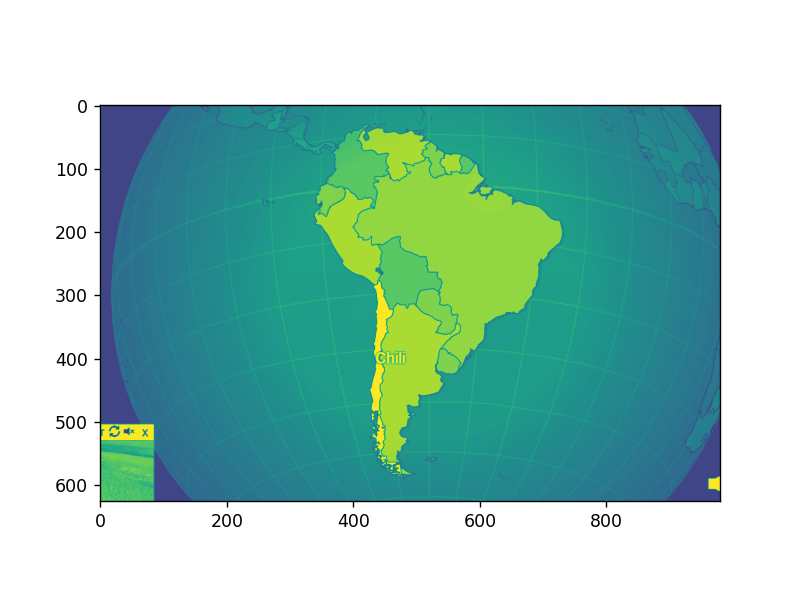

Le Guyana 531 67
Country not in list
Le Chili 446 412


In [39]:
countryList = []
# countryList.append(Country("Le Chili", 435, 418))
# countryList.append(Country("Le Guyana", 531, 82))

for i in range(15):
    time.sleep(1) # wait for country name to appear
    name = browser.find_element(By.ID,'questionTextLabel').text
    if name not in countryList:
        print("Country not in list")
        cX, cY = get_country_position()
        countryList.append(Country(name, cX, cY))
        print(name, cX, cY)
    else:
        print("Country already in list")
        cX, cY = countryList[i].cX, countryList[i].cY

{'x': 310, 'y': 1076}
{'height': 600, 'width': 900}
900 600


<IPython.core.display.Javascript object>


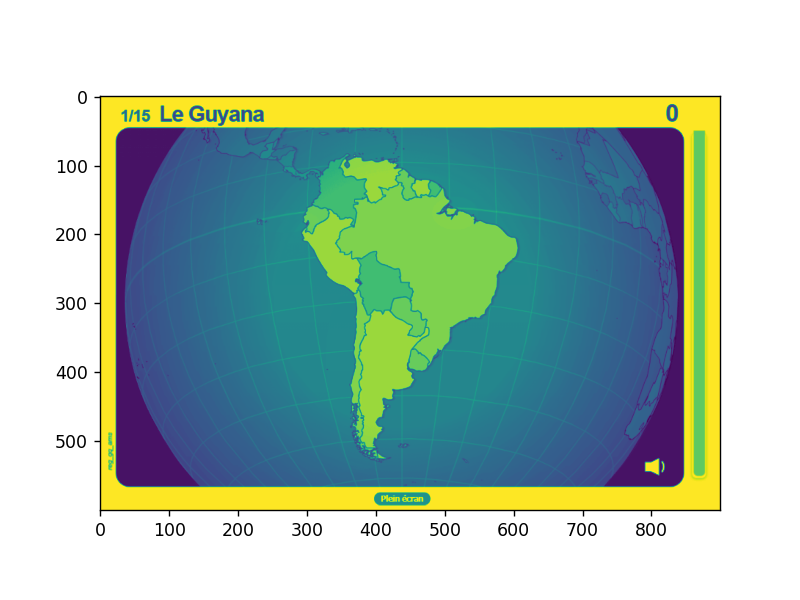

<function matplotlib.pyplot.show(block=None)>

In [101]:
canvas = browser.find_element(By.ID,'canvas')
location = canvas.location
size = canvas.size
w, h = size['width'], size['height']

print(location)
print(size)
print(w, h)

canvas.screenshot('test.png')
prod = cv2.imread('test.PNG',0)

#canvas.screenshot_as_png("image.png")


plt.figure()
plt.imshow(prod)
plt.show

In [95]:
# x=310+112
# y=1076-1076+60
# w=1125-113
# h=750-100

w_page = 1920
h_page = 1080

y_scroll = 1076

x_canva = 310
y_canva = 1076
w_canva = 900
h_canva = 600

x_crop = x_canva
y_crop = y_canva - y_scroll
w_crop = w_canva
h_crop = h_canva

background = cv2.imread('bg_south_america.PNG',0)[y_crop:y_crop+h_crop, x_crop:x_crop+w_crop]

canvas.screenshot("image.png")


plt.figure()
plt.imshow(background)
plt.show



TypeError: 'bytes' object is not callable

In [3]:
time.sleep(2)
action = ActionChains(browser)
canvas = browser.find_element(By.ID,'canvas')
action.move_to_element_with_offset(canvas,0 ,0 ).click().perform()
time.sleep(0.1) # wait for map appear
canvas.screenshot("wrong_click.PNG") # save background for diff later

True

<IPython.core.display.Javascript object>


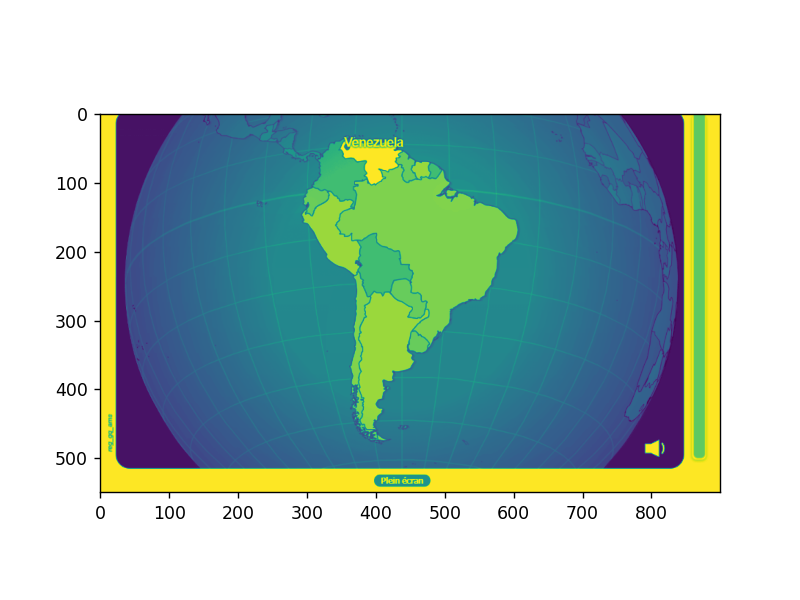

448 248


In [4]:
w_page = 1920
h_page = 1080

y_scroll = 1076

x_canva = 310
y_canva = 1076
w_canva = 900
h_canva = 600

x_crop = 0
y_crop = 50
w_crop = w_canva
h_crop = h_canva

background = cv2.imread('bg_southamerica.PNG',0)[y_crop:y_crop+h_crop, x_crop:x_crop+w_crop]
after = cv2.imread('wrong_click.PNG',0)[y_crop:y_crop+h_crop, x_crop:x_crop+w_crop]

diff = cv2.absdiff(background, after)
ret,thresh = cv2.threshold(diff,10,255,cv2.THRESH_BINARY)
canny_edges = cv2.Canny(thresh, 30, 200)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cXlist=[]
cYlist=[]

for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cXlist.append(cX)
        cYlist.append(cY)
    else:
        cX, cY = 0, 0

cv2.circle(after, (cXlist[0], cYlist[0]), 5, (255, 0, 0), -1)
cv2.putText(after, "centroid", (cXlist[0] - 25, cYlist[0] - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

plt.figure
plt.imshow(after)
plt.show()
print(cX,cY)

In [34]:
# x_zero = 448
# y_zero = 248

# action.move_to_element_with_offset(canvas,0,0).click().perform()


def screenshotToSeleniumCoordinates(x_screenshot,y_screenshot) :
    # transposes screenshot xy coordinates (relative to left top corner of img), to selenium xy coordinates (relative to center of element(canvas))
    x_selenium = x_screenshot-448
    y_selenium = y_screenshot-248
    return x_selenium,y_selenium


In [24]:
time.sleep(2)
action = ActionChains(browser)
canvas = browser.find_element(By.ID,'canvas')
action.move_to_element(canvas).perform()
action.move_by_offset(0,0).click().perform()

In [ ]:
## PROD TEST

In [43]:

w_page = 1920
h_page = 1080

y_scroll = 1076

x_canva = 310
y_canva = 1076
w_canva = 900
h_canva = 600

x_crop = 0
y_crop = 50
w_crop = w_canva
h_crop = h_canva
action = ActionChains(browser)
canvas = browser.find_element(By.ID,'canvas')
action.move_to_element_with_offset(canvas,0,0).click().perform()
time.sleep(0.1)
action.move_to_element_with_offset(canvas,0,0).click().perform()
time.sleep(0.1)
action.move_to_element_with_offset(canvas,0,0).click().perform()
time.sleep(0.4)
canvas.screenshot("screenshot.PNG")

background = cv2.imread('bg_southamerica.PNG',0)[y_crop:y_crop+h_crop, x_crop:x_crop+w_crop]
after = cv2.imread('screenshot.PNG',0)[y_crop:y_crop+h_crop, x_crop:x_crop+w_crop]

diff = cv2.absdiff(background, after)
ret,thresh = cv2.threshold(diff,10,255,cv2.THRESH_BINARY)
canny_edges = cv2.Canny(thresh, 30, 200)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cXlist=[]
cYlist=[]

for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cXlist.append(cX)
        cYlist.append(cY)
    else:
        cX, cY = 0, 0

time.sleep(1)

x_click,y_click = screenshotToSeleniumCoordinates(cXlist[0],cYlist[0])

action.move_to_element(canvas).perform()
action.move_by_offset(x_click,y_click).click().perform()



IndexError: list index out of range